# Bagging and random forest

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Load Data

In [5]:
X = load_digits().data
y = load_digits().target

In [17]:
print y

[0 1 2 ..., 8 9 8]


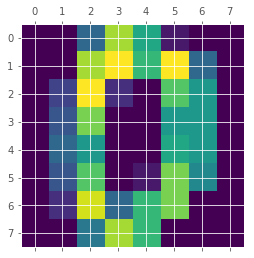

In [20]:
plt.matshow(X[0].reshape(8, -1)) 
plt.show() 

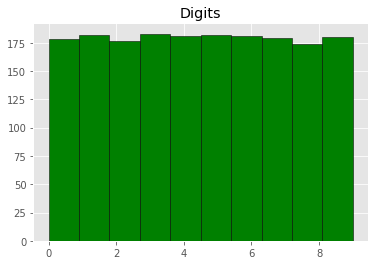

In [32]:
plt.hist(y, histtype='bar', color='green', edgecolor='black')
plt.title('Digits')
plt.show()

## Classification

### Single tree classifier

In [55]:
def write_answer_1(score):
    with open("random_forest_1.txt", "w") as fout:
        fout.write(str(score))

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
score = cross_val_score(clf, X, y, cv=10).mean()

print score
write_answer_1(score)

0.832023226765


### Bagging on 100 tree classifier

In [64]:
def write_answer_2(score):
    with open("random_forest_2.txt", "w") as fout:
        fout.write(str(score))
        
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
score = cross_val_score(clf, X, y, cv=10).mean()

print score
write_answer_2(score)

0.925393728795


### Bagging with $\sqrt{d}$ random feature classifier

In [80]:
print sqrt(X.shape[0]) / X.shape[0]

0.0235898924811


In [91]:
%%time
from math import sqrt
def write_answer_3(score):
    with open("random_forest_3.txt", "w") as fout:
        fout.write(str(score))
        
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt'),
                        n_estimators=100)
sum = 0.
for i in range(1):
    sum += cross_val_score(clf, X, y, cv=10).mean()
    
sum /= 1

print sum
write_answer_3(sum)

0.950631440195
CPU times: user 6.41 s, sys: 62.4 ms, total: 6.47 s
Wall time: 6.54 s


### Bagging with $\sqrt{d}$ random feature classifier in each vertex

In [85]:
%%time
from math import sqrt
def write_answer_4(score):
    with open("random_forest_4.txt", "w") as fout:
        fout.write(str(score))
        
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt'),
                        n_estimators=100)
sum = 0.
for i in range(1):
    sum += cross_val_score(clf, X, y, cv=10).mean()
    
sum /= 1

print sum
write_answer_4(sum)

0.955071467946
CPU times: user 6.21 s, sys: 46.5 ms, total: 6.26 s
Wall time: 6.3 s


### Random forest

In [103]:
%%time
def write_answer_5(l):
    with open("random_forest_5.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in l]))
        
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=90, max_features='sqrt')

sum = 0.
for i in range(1):
    sum += cross_val_score(clf, X, y, cv=10).mean()
    
sum /= 1

l = [2, 3, 4, 7]
print sum
write_answer_5(l)

0.947790884612
CPU times: user 7.31 s, sys: 153 ms, total: 7.46 s
Wall time: 7.76 s


### Relation between hyper-parameters and score

In [115]:
sqrt_f = sqrt(X.shape[0]) / X.shape[0] + 0.15 #??
mx_ft = [sqrt_f, 0.5, 1.]
n_est =[5, 10, 15, 100, 150]

py = []
for ft in mx_ft:
    clf = RandomForestClassifier(n_estimators=50, max_features=ft)
    py.append(cross_val_score(clf, X, y, cv=10).mean())
    
print py

[0.94781211272124977, 0.93994014631989453, 0.91823420553112045]


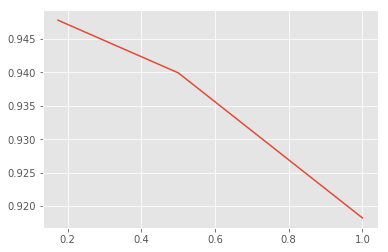

In [116]:
plt.plot(mx_ft, py)

[0.88267158180127281, 0.92160584419683489, 0.93330174153975631, 0.95279278106938181, 0.95279163323869587]


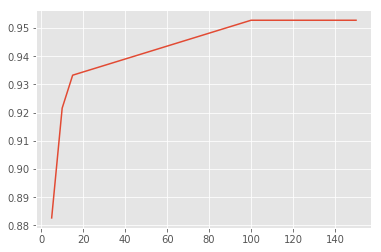

In [112]:
py = []
for est in n_est:
    clf = RandomForestClassifier(n_estimators=est, max_features='sqrt')
    py.append(cross_val_score(clf, X, y, cv=10).mean())
    
print py
plt.plot(n_est, py)

[0.91308734626689991, 0.94939630275945319, 0.94997526716908143, 0.95051437377808112, 0.95277432056525657]


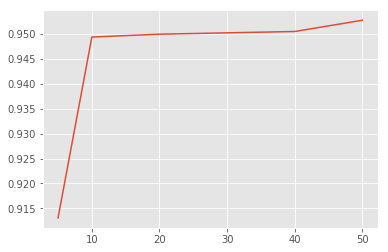

In [119]:
mx_dpth = [5, 10, 20, 40, 50]
py = []
for dpth in mx_dpth:
    clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=dpth)
    py.append(cross_val_score(clf, X, y, cv=10).mean())
    
print py
plt.plot(mx_dpth, py)